## MINI PROJECT - DATA ANALYTICS

> ### OBJECTIVE: 
> - To demonstrate practical skills in data preprocessing and descriptive analysis.
> 
> ### DATASET: 
> - The Melbourne Housing Market dataset, available at [Kaggle - Melbourne Housing](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data).

### BACKGROUND

Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe you can find a trend to this matter? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should you buy a 2 bedroom unit?

### CONTENT & ACKNOWLEDGEMENTS
This data was scraped from publicly available results posted every week from Domain.com.au, it's cleaned, but you should check it properly to make sure the data analysis is valid. 

The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

### DATA DICTIONARY AND KEY DETAILS

- **Suburb:** Suburb
- **Address:** Address
- **Rooms:** Number of rooms
- **Price:** Price in Australian dollars

- **Method:**
**S** - property sold;
**SP** - property sold prior;
**PI** - property passed in;
**PN** - sold prior not disclosed;
**SN** - sold not disclosed;
**NB** - no bid;
**VB** - vendor bid;
**W** - withdrawn prior to auction;
**SA** - sold after auction;
**SS** - sold after auction price not disclosed.
**N/A** - price or highest bid not available.

- **Type:**
**br** - bedroom(s);
**h** - house,cottage,villa, semi,terrace;
**u** - unit, duplex;
**t** - townhouse;
**dev site** - development site;
**o res** - other residential.

- **SellerG:** Real Estate Agent
- **Date:** Date sold
- **Distance:** Distance from CBD in Kilometres
- **Regionname:** General Region (West, North West, North, North east …etc)
- **Propertycount:** Number of properties that exist in the suburb.
- **Bedroom2:** Scraped # of Bedrooms (from different source)
- **Bathroom:** Number of Bathrooms
- **Car:** Number of carspots
- **Landsize:** Land Size in Metres
- **BuildingArea:** Building Size in Metres
- **YearBuilt:** Year the house was built
- **CouncilArea:** Governing council for the area
- **Lattitude:** Self explanitory
- **Longtitude:** Self explanitory

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure. 
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [1]:
# Liblary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('data/Melbourne_Housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
print("Number of rows and columns:", df.shape)

Number of rows and columns: (13580, 21)


In [5]:
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


In [6]:
print("Missing values of data:\n", df.isna().sum())

Missing values of data:
 Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [7]:
# Show few rows of the dataset
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Berdasarkan pada langkah 1: Data Quality Assessement, mendapatkan kesimpulan bahwa: 
- dataset hanya memiliki 3 tipe data yaitu Int,Float, dan object.
- terdapat tidak kesesuaian tipe data seperti kolom 'Date' yang harusnya menjadi tipe data datetime dengan format tanggal-bulan-tahun, kolom 'YearBuilt' yang harusnya menjadi tipe data datetime dengan format tahun, dan kolom 'car', 'postcode', 'bedroom2', 'bathroom', 'propertycount' yang harusnya menjadi tipe data int, karena menurut kami kolom tersebut hanya akan berisikan nilai numeric bulat.
- terdapat missing values pada kolom 'car','buildingarea', 'yearbuilt', dan 'councilarea'. Kami akan handling missing values tersebut pada step selanjutnya

### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

In [8]:
from datetime import datetime
# Mengganti tipe data kolom date menjadi 'date'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [9]:
# Mengganti tipe data kolom date menjadi 'date' dalam format 'year'
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'], format='%Y', errors='coerce')
df['YearBuilt'] = df['YearBuilt'].dt.year.astype('Int64')

In [10]:
# Mengganti tipe data kolom postcode, berdroom2, bathroom, dan propertycount menjadi 'int64'
df[['Postcode', 'Bedroom2', 'Bathroom', 'Propertycount']] = df[['Postcode', 'Bedroom2', 'Bathroom', 'Propertycount']].astype('int64')

In [11]:
df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom2                  int64
Bathroom                  int64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt                 Int64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount             int64
dtype: object

Berdasarkan langkah 2: Data Type Transformation, mendapatkan kesimpulan bahwa:
- kami telah mengganti tipe data kolom 'Date' menjadi tipe data datetime
- mengganti tipe data kolom 'postcode', 'bedroom2', 'bathroom', dan 'propertycount' menjadi tipe data int
- untuk kolom 'car' belum bisa diganti menjadi tipe data int, karena masih terdapat missing values, maka dari itu kami akan mengganti tipe data kolom 'car' sesudah menghandling missing values pada kolom tersebut.

In [12]:
df.shape

(13580, 21)

### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [13]:
# Identify any columns that have missing values, you can also show the number and percentage of missing values.
print("Number of missing values in each column:\n", df.isna().sum())
print("\nPercentage of missing values in each column (decimal):\n", (df.isna().sum() / len(df)) * 100)
print("\nPercentage of missing values in each column:\n", (df.isnull().sum() / len(df) * 100).round(2).astype(str) + '%')

Number of missing values in each column:
 Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5376
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Percentage of missing values in each column (decimal):
 Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.5

In [14]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8204.0,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.777913,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,36.296864,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.0,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.0,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.0,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.0,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.0,-37.408530,145.526350,21650.000000


In [15]:
# fill 'BuildingArea' data with mean
df['BuildingArea'] = df['BuildingArea'].fillna(round(df['BuildingArea'].mean(),2))

In [16]:
# fill 'YearBuilt' data with mode
mode_yearB = df['YearBuilt'].mode()

# Menampilkan nilai modus
print("Mode of YearBuilt:", mode_yearB)

Mode of YearBuilt: 0    1970
Name: YearBuilt, dtype: Int64


In [17]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mode()[0])

In [18]:
# Handling missing values Council Area
df['CouncilArea'].describe()

count        12211
unique          33
top       Moreland
freq          1163
Name: CouncilArea, dtype: object

In [19]:
df['CouncilArea'] = df['CouncilArea'].fillna('Moreland')

In [20]:
df.shape

(13580, 21)

In [21]:
# Handling missing values kolom car dengan delete listwise/delet baris
df = df.dropna()

In [22]:
df.shape

(13518, 21)

In [23]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [24]:
df['Car'] = df['Car'].astype('int64')

In [25]:
df.shape

(13518, 21)

Berdasarkan langkah 3: Handling Missing Values, mendapatkan kesimpulan bahwa:
- kami handling missing values pada kolom 'BuildingArea' dengan nilai mean/rata-rata nya '151.96'
- handling missing values pada kolom 'YearBuilt' dengan nilai modus nya '1970'
- handling missing values pada kolom 'CouncilArea' dengan nilai modus nya 'Moreland'
- handling missing values pada kolom 'Car' dengan cara listwise/row dropping
- terakhir sesuai yang telah kami jelaskan pada langkah 2, kami mengubah tipe data kolom 'Car' menjadi tipe data int

### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers: 
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [26]:
df_num = df.select_dtypes(include = ['int64', 'float64']) 

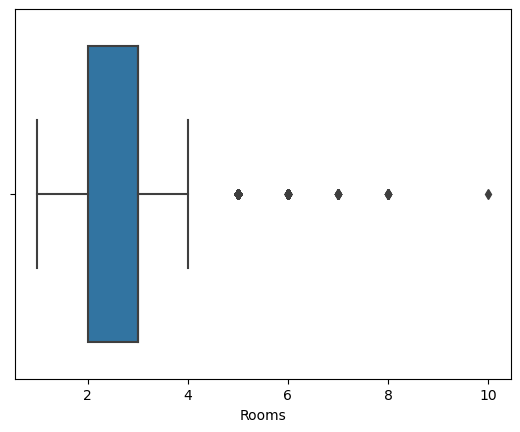

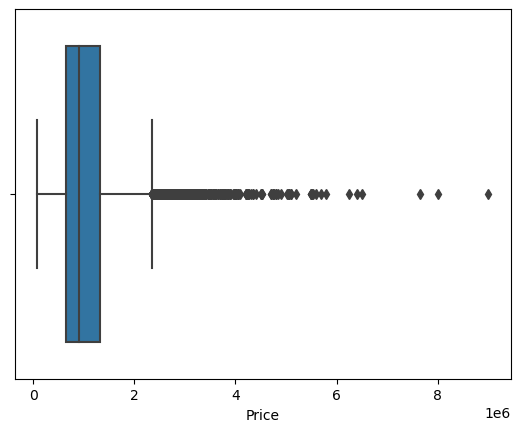

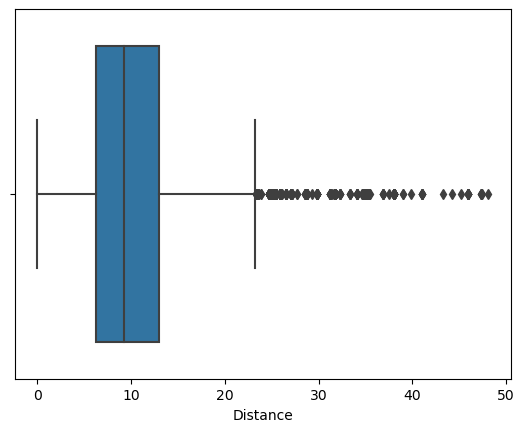

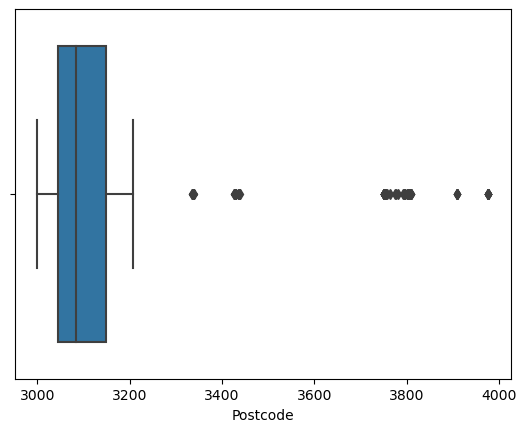

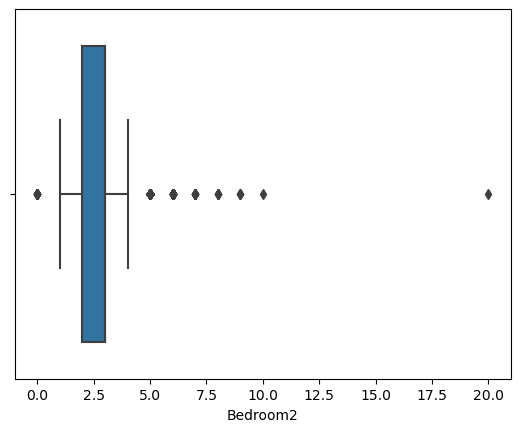

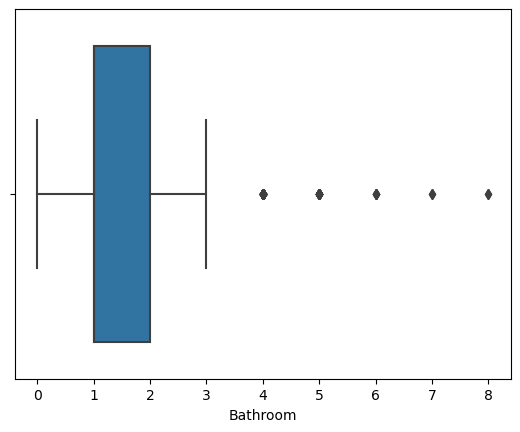

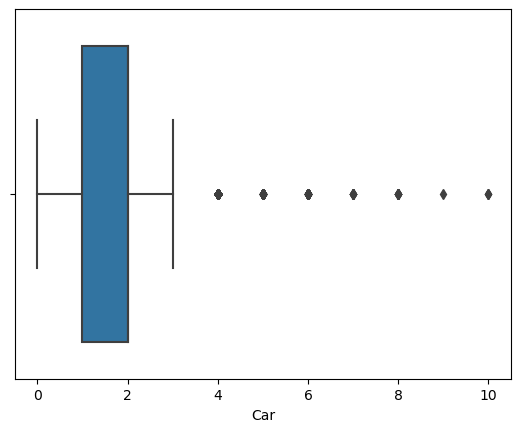

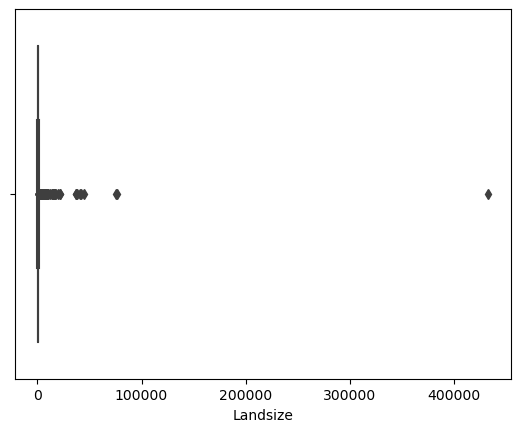

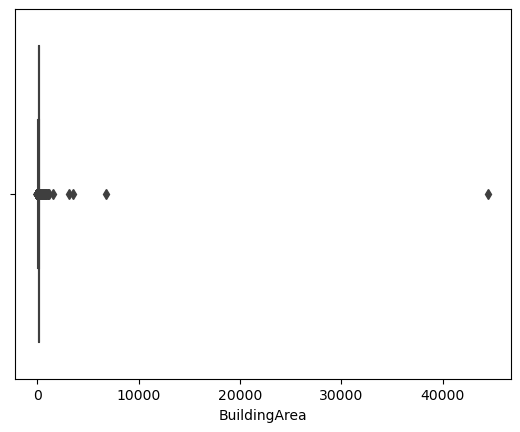

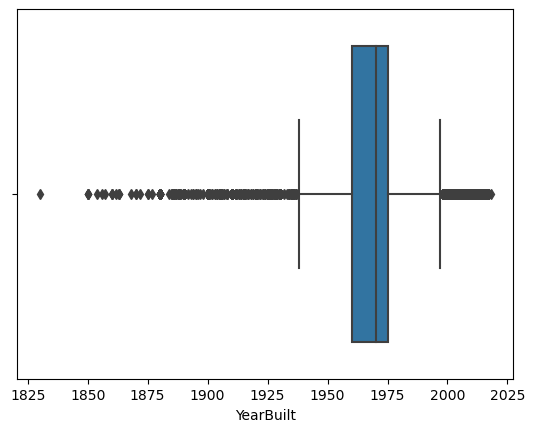

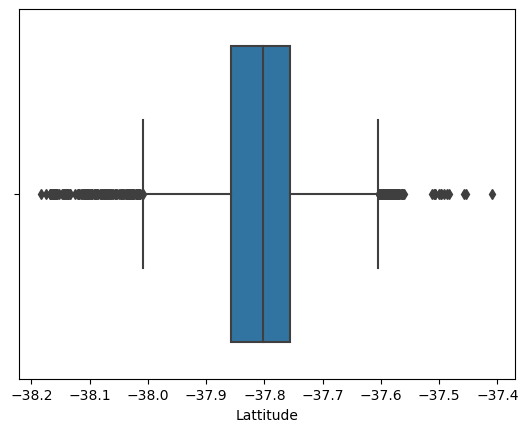

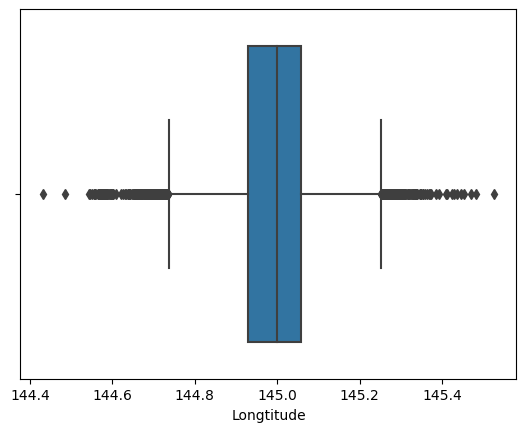

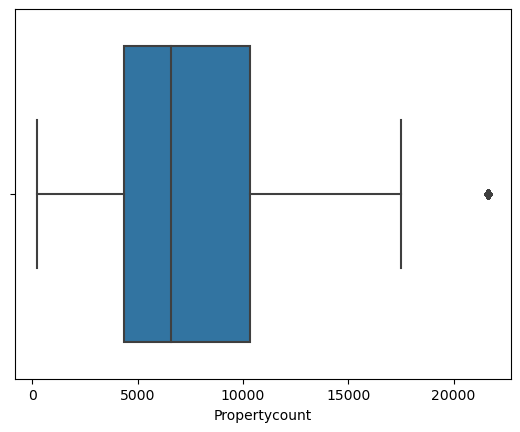

In [27]:
# Detecting outliers using boxplot
for i in df_num:
    sns.boxplot(data= df_num, x=i)
    plt.show()

In [28]:
df.shape

(13518, 21)

In [29]:
# Fungsi untuk mengidentifikasi outliers menggunakan metode IQR
def find_outliers_iqr(column):
    if df[column].dtype in ['int64', 'float64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers
    else:
        return pd.DataFrame()

# Mengidentifikasi kolom-kolom dengan outliers
columns_with_outliers = []
outliers_counts = {}

for column in df.columns:
    outliers = find_outliers_iqr(column)
    if not outliers.empty:
        columns_with_outliers.append(column)
        outliers_counts[column] = len(outliers)

# Strategi untuk menangani outliers: Menghapus baris yang mengandung outliers
for column in columns_with_outliers:
    outliers = find_outliers_iqr(column)
    df = df.drop(outliers.index)

In [30]:
# Menampilkan kolom-kolom dengan outliers dan jumlah outliers
print("Columns with outliers and the number of outliers detected:")
for column in columns_with_outliers:
    print(f"{column}: {outliers_counts[column]} outliers")

Columns with outliers and the number of outliers detected:
Rooms: 682 outliers
Price: 621 outliers
Distance: 413 outliers
Postcode: 207 outliers
Bedroom2: 655 outliers
Bathroom: 143 outliers
Car: 644 outliers
Landsize: 365 outliers
BuildingArea: 2393 outliers
Lattitude: 259 outliers
Longtitude: 404 outliers
Propertycount: 359 outliers


In [31]:
# Menampilkan informasi setelah penanganan outliers
print("\nNumber of rows after handling outliers:", len(df))


Number of rows after handling outliers: 9542


In [32]:
# Menampilkan kolom-kolom dengan outliers dan jumlah outliers setelah penghapusan
print("\nColumns with outliers and the number of outliers detected after handling:")
outliers_counts_after = {}
for column in columns_with_outliers:
    outliers_after = find_outliers_iqr(column)
    outliers_counts_after[column] = len(outliers_after)
    print(f"{column}: {outliers_counts_after[column]} outliers")


Columns with outliers and the number of outliers detected after handling:
Rooms: 0 outliers
Price: 83 outliers
Distance: 33 outliers
Postcode: 0 outliers
Bedroom2: 0 outliers
Bathroom: 0 outliers
Car: 0 outliers
Landsize: 11 outliers
BuildingArea: 451 outliers
Lattitude: 11 outliers
Longtitude: 0 outliers
Propertycount: 32 outliers


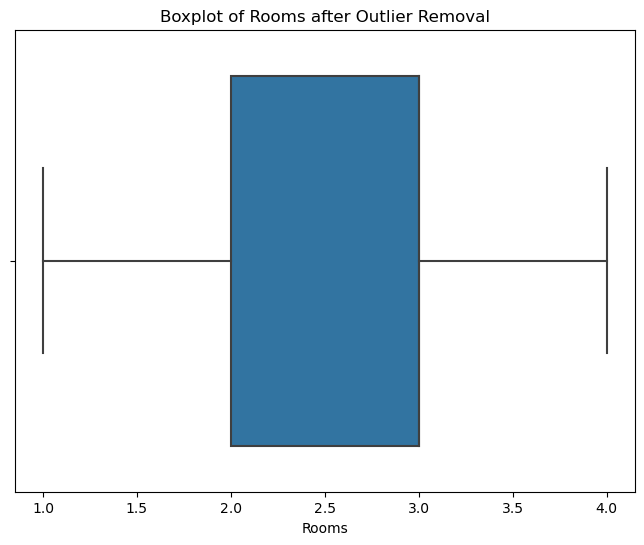

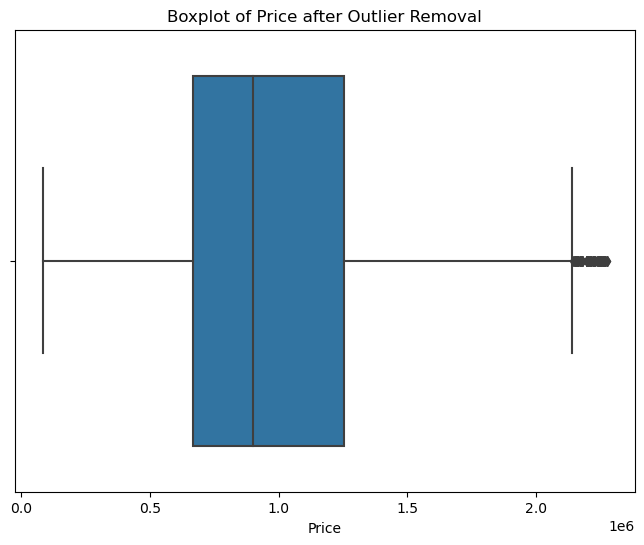

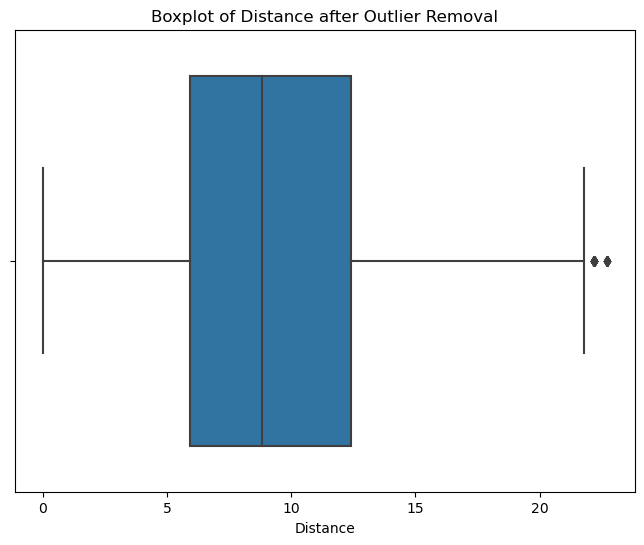

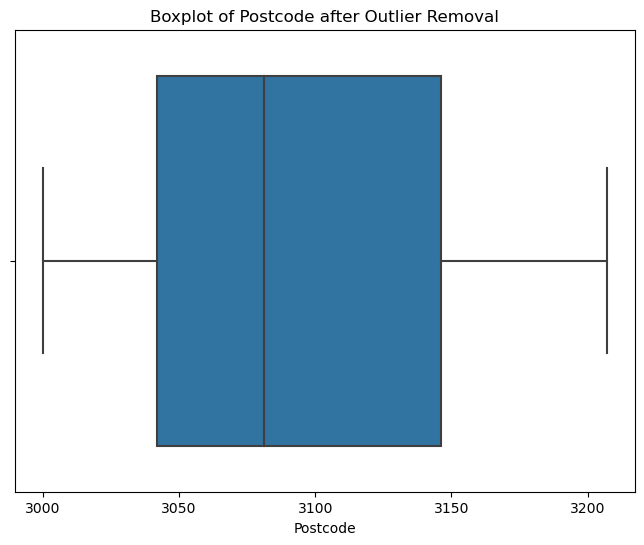

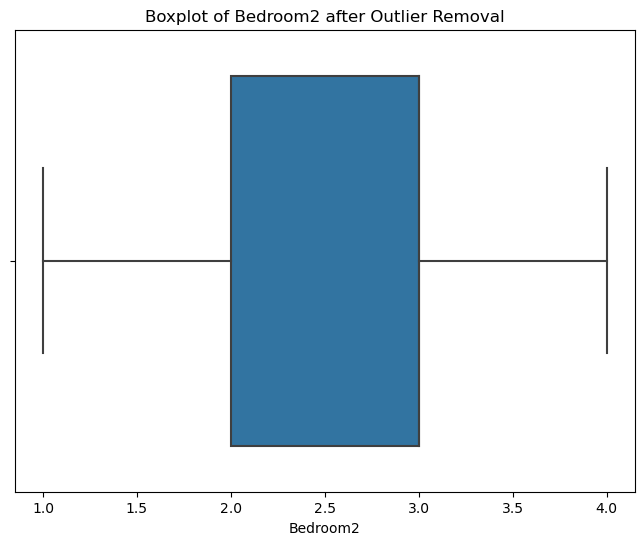

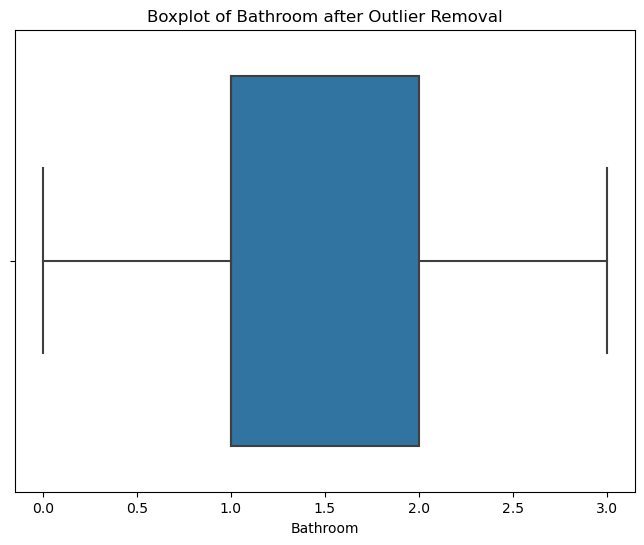

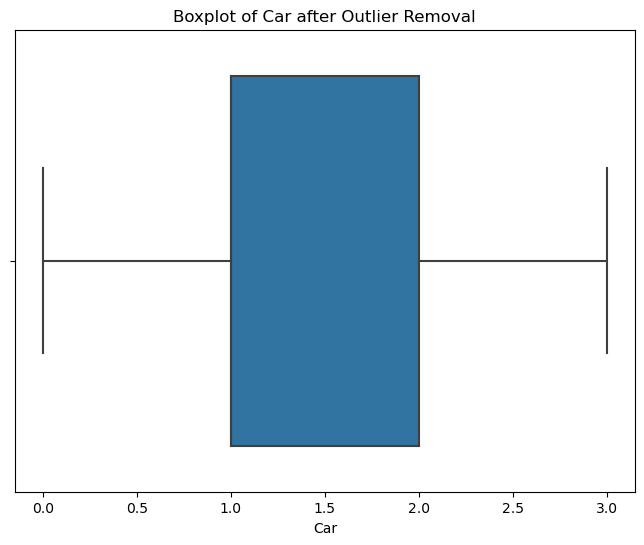

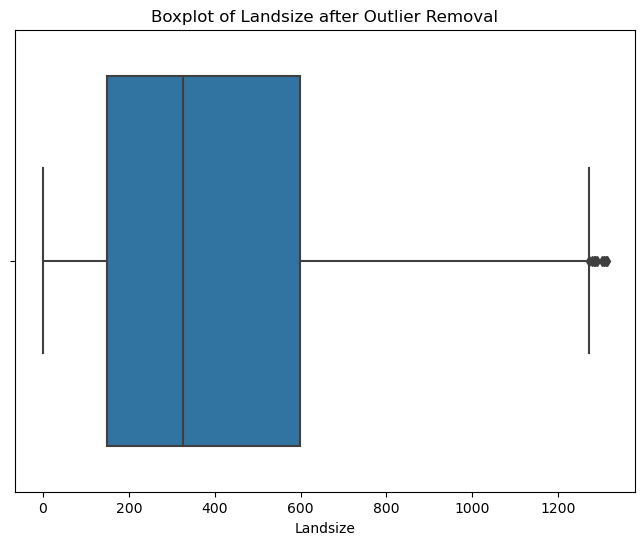

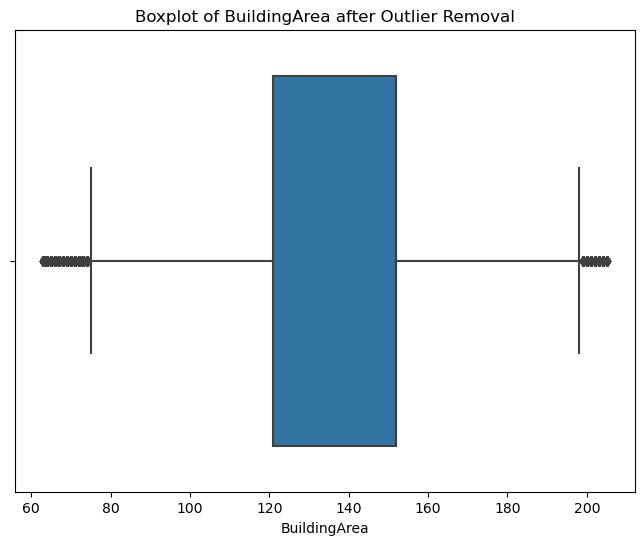

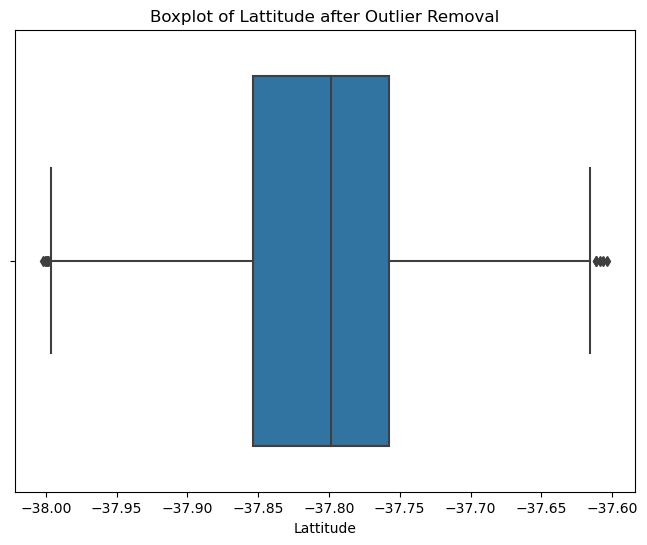

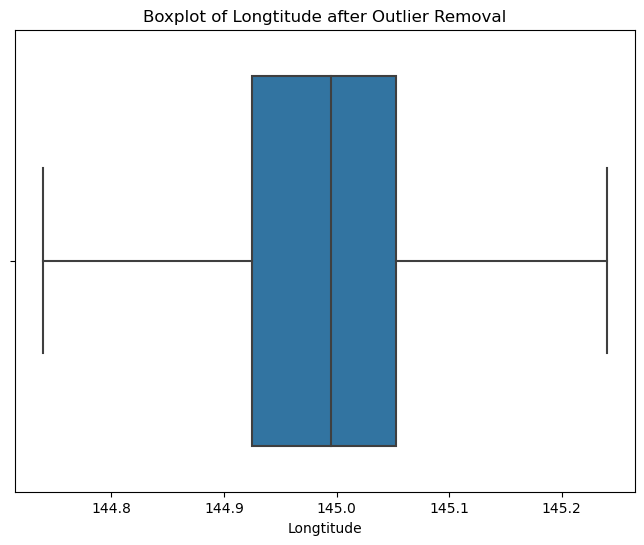

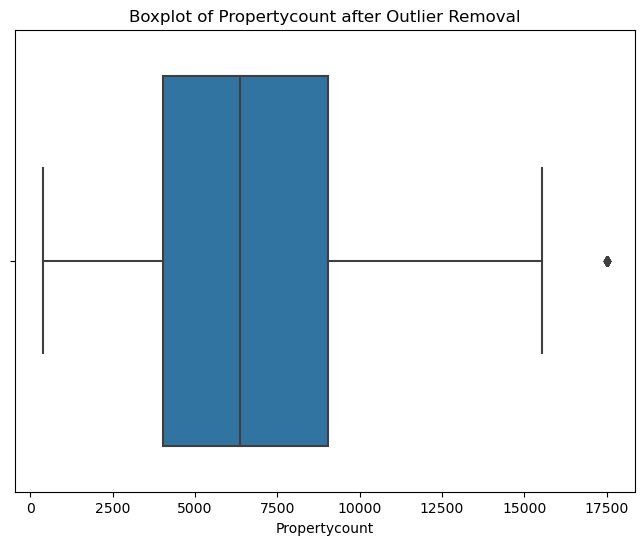

In [33]:
# Checking outlier using boxplot after handling with drop
for column in columns_with_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} after Outlier Removal')
    plt.show()

In [34]:
df.shape

(9542, 21)

Berdasarkan langkah 4: Detecting and Handling Outliers, mendapatkan kesimpulan bahwa:

Setelah cek menggunakan metode boxplot dan IQR dengan faktor batas nya 1.5,
Terdapat banyak outliers pada kolom:
- Rooms: 682 outliers
- Price: 997 outliers
- Distance: 784 outliers
- Postcode: 207 outliers
- Bedroom2: 655 outliers
- Bathroom: 143 outliers
- Car: 644 outliers
- Landsize: 483 outliers
- BuildingArea: 3331 outliers
- Lattitude: 632 outliers
- Longtitude: 786 outliers
- Propertycount: 445 outliers

Dan telah kami handling dengan cara drop, jumlah baris dan kolom pada data menjadi (9542,21)

Setelah kami cek ulang outlier menggunakan boxplot dan IQR masih terdapat sedikit outlier, sebagai berikut:
- Rooms: 0 outliers
- Price: 83 outliers
- Distance: 33 outliers
- Postcode: 0 outliers
- Bedroom2: 0 outliers
- Bathroom: 0 outliers
- Car: 0 outliers
- Landsize: 11 outliers
- BuildingArea: 451 outliers
- Lattitude: 11 outliers
- Longtitude: 0 outliers
- Propertycount: 32 outliers

tetapi tidak kami handling, karena menurut kami tidak akan memengaruhi data nya.

### 5. DESCRIPTIVE ANALYSIS
> Explore the data by doing descriptive analysis.
> 
> Descriptive Statistics: 
> - Compute and report central tendencies (mean, median, mode) for relevant columns.
> - Report dispersions (variance, standard deviation, range) for key numerical columns.
> - Analyze the distribution of key categorical variables, including counts and proportions.
>
> Visual Analysis (optional):
> - Use histograms, box plots, and bar charts to visualize distributions and relationships of key variables.

### 6. SUMMARY
> Summarize the analysis process: 
> - Highlight key findings from the descriptive analysis.
> - Highlight any challenges encountered during the analysis and how they were addressed. (optional)
> - Provide potential insights or observations based on the analysis. (optional)

### 7. EXPORT THE CLEANED DATA
> - Export the cleaned data to a CSV file.
>
> - Ensure that the data is formatted correctly for Google Sheets import.